# Comprehensions BEGINNER

Esta tabla contiene la información de las comprehensiones.

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'comprehension__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('comprehensions')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-07-05 11:03:04.239477 Data cache files found ...
2024-07-05 11:03:04.244467 Data cache files successfully loaded!!
The dataset contains 4982 (27.29%) instances for BEGINNER class and 13277 (72.71%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'comprehensions'
TABLE_FEATURES = ['comprehension__category', 'comprehension__number_of_ifs', 'comprehension__number_of_generators', 'comprehension__is_async']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (4982, 4)
As we can see the downloaded data contains a total of 4982 instances. For each instance we have 4 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4982 entries, 0 to 4981
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   comprehension__category              4982 non-null   object
 1   comprehension__number_of_ifs         4982 non-null   int64 
 2   comprehension__number_of_generators  4982 non-null   int64 
 3   comprehension__is_async              4982 non-null   bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 160.6+ KB
None


Cómo podemos ver la tabla está compuesta por 2 variables numéricas, 1 boleanas y 1 de tipo objeto.

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

comprehension__category                0
comprehension__number_of_ifs           0
comprehension__number_of_generators    0
comprehension__is_async                0
dtype: int64

In [5]:
print_empty_cols(X)

comprehension__category
-----------------------
0 instancias no tienen un valor para la columna comprehension__category


comprehension__number_of_ifs
----------------------------
0 instancias no tienen un valor para la columna comprehension__number_of_ifs


comprehension__number_of_generators
-----------------------------------
0 instancias no tienen un valor para la columna comprehension__number_of_generators


comprehension__is_async
-----------------------
0 instancias no tienen un valor para la columna comprehension__is_async




### 2.2 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
comprehension__category,4982,4,GeneratorComprehension,2414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comprehension__number_of_ifs,4982.0,NaN,NaN,NaN,0.251907,0.436917,0.0,0.0,0.0,1.0,2.0
comprehension__number_of_generators,4982.0,NaN,NaN,NaN,1.034123,0.19438,1.0,1.0,1.0,1.0,3.0
comprehension__is_async,4982,1,False,4982,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "comprehension__number_of_ifs": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 2.0
    "comprehension__number_of_generators": [(0.0, 1.0), (1.0, 1.0), (1.0, inf)],  # min: 1.0 max: 4.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['comprehension__number_of_ifs'], 10))
print(get_statistics(X_copy, ['comprehension__number_of_generators'], 10))
print(get_statistics(full_table, ['comprehension__category'], 10))
print(get_statistics(X_copy, ['comprehension__is_async'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
comprehension__number_of_ifs  count  percentage
                   [0.0_0.0]   3733   74.929747
                   [0.0_inf]   1249   25.070253

comprehension__number_of_generators  count  percentage
                          [1.0_1.0]   4824   96.828583
                          [1.0_inf]    158    3.171417

comprehension__category  count  percentage
 GeneratorComprehension   2414   48.454436
      ListComprehension   2166   43.476515
      DictComprehension    289    5.800883
       SetComprehension    113    2.268165

 comprehension__is_async  count  percentage
                   False   4982       100.0

--- TWO FEATURES ---
--- THREE FEATURES ---


In [8]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (4982, 7)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

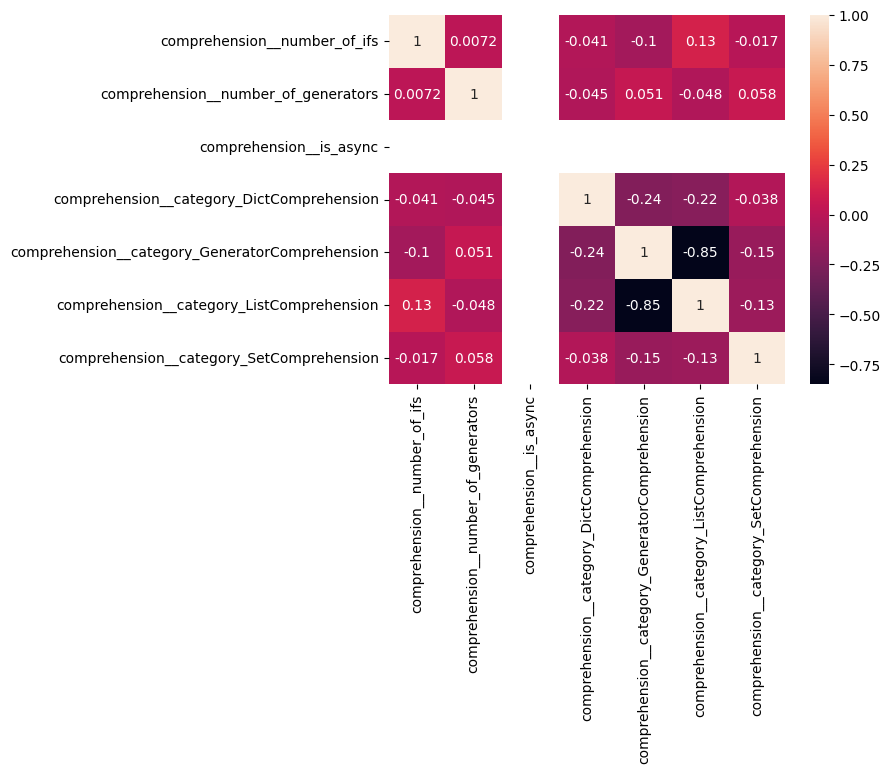

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 4 variable (1 booleanas, 2 numericas y 1 categóricas) se hara un analisis detallado

### Variable is_async (1/4)
Esta variable es de tipo booleano y representa si la comprehension es asincrona. El primer paso es hacer un análisis visual de como se distribuyen los valores de la variable.

<Axes: xlabel='comprehension__is_async', ylabel='Count'>

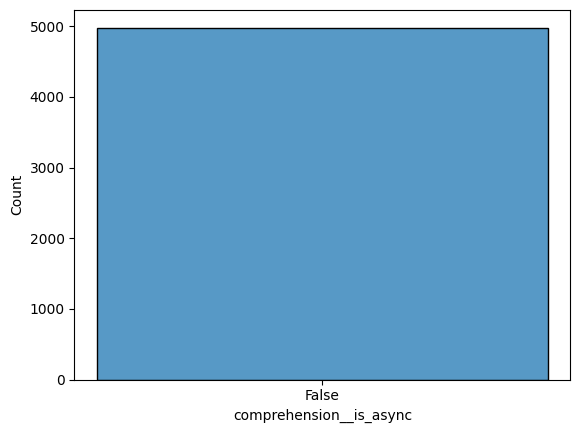

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['comprehension__is_async'], discrete=True)

In [11]:
num_true_values = len(X[X['comprehension__is_async'] == True])
num_false_values = len(X[X['comprehension__is_async'] == False])
std = X['comprehension__is_async'].std()
freq_true = len(X[X['comprehension__is_async'] == True]) / len(X['comprehension__is_async'])
freq_false = len(X[X['comprehension__is_async'] == False]) / len(X['comprehension__is_async'])
print(f'La variable is_async contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_async a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_async a False es {freq_false}.')

La variable is_async contiene 0 valores verdaderos y 4982 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable is_async a True es 0.0.
La frecuencia con la que programa puede tener la variable is_async a False es 1.0.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'comprehension__is_async', possible_values)

La variable comprehension__is_async contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable comprehension__is_async toma el valor de 0.0 en un 100.0% de los items.
La variable comprehension__is_async toma el valor de True en un 0.0% de los items. [OUTLIER]


In [13]:
X[X['comprehension__is_async'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,comprehension__number_of_ifs,comprehension__number_of_generators,comprehension__is_async,comprehension__category_DictComprehension,comprehension__category_GeneratorComprehension,comprehension__category_ListComprehension,comprehension__category_SetComprehension
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
La variable nunca toma el valor verdadero

### Variable number_of_ifs (2/4)
Esta variable representa el número de clausulas if en la comprehension. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 2. Con una media de 0.25.

<Axes: ylabel='comprehension__number_of_ifs'>

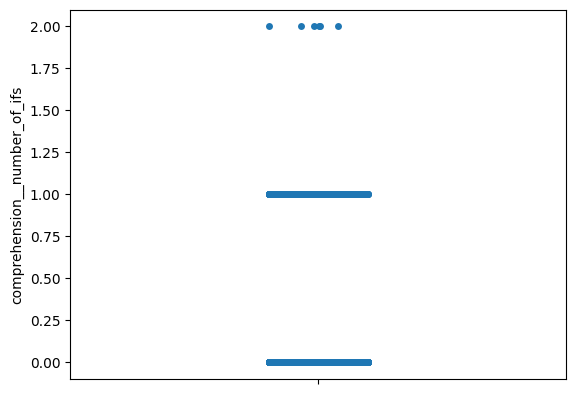

In [14]:
sns.stripplot(X['comprehension__number_of_ifs'])

In [15]:
print_outliers_for_df_column(X, 'comprehension__number_of_ifs')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6555878818035126
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.15120897202550937,21.652092279637145]
-3.0IQR: 0 instancias tienen un valor para comprehension__number_of_ifs inferior a -3.0 (Q1-3*IQR) para comprehension__number_of_ifs. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para comprehension__number_of_ifs inferior a -1.5 (Q1-1.5*IQR) para comprehension__number_of_ifs. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para comprehension__number_of_ifs superior a 2.5 (Q3+1.5*IQR) para comprehension__number_of_ifs. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para comprehension__number_of_ifs superior a 4.0 (Q3-3*IQR) para comprehension__number_of_ifs. Representando un 0.0% del total de instancias.
L: 0 

In [16]:
X[X['comprehension__number_of_ifs'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,comprehension__number_of_ifs,comprehension__number_of_generators,comprehension__is_async,comprehension__category_DictComprehension,comprehension__category_GeneratorComprehension,comprehension__category_ListComprehension,comprehension__category_SetComprehension
count,1249.000000,1249.000000,1249.0,1249.000000,1249.000000,1249.000000,1249.000000
mean,1.004804,1.032826,0.0,0.041633,0.397118,0.542834,0.018415
std,0.069171,0.178253,0.0,0.199830,0.489497,0.498361,0.134499
min,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.0,0.000000,1.000000,1.000000,0.000000
max,2.000000,2.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Variable number_of_generators (3/4)
Esta variable representa el número generators presentes en la comprehension. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 3. Con una media de 1.03.

<Axes: ylabel='comprehension__number_of_generators'>

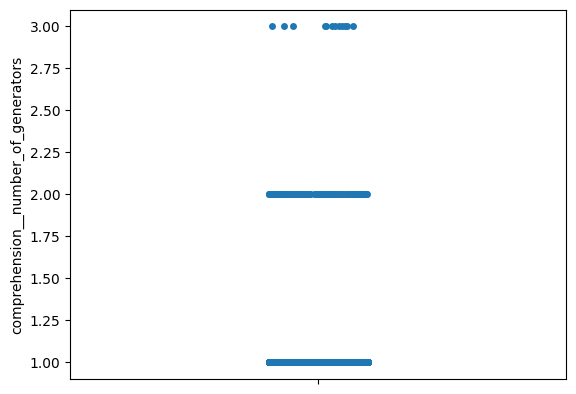

In [17]:
sns.stripplot(X['comprehension__number_of_generators'])

In [18]:
print_outliers_for_df_column(X, 'comprehension__number_of_generators')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 1.0
Rango valores atípicos extremos (Tukey): [1.0,1.0]
Rango valores atípicos leves (Tukey): [1.0,1.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.0,1.0]
-3.0IQR: 0 instancias tienen un valor para comprehension__number_of_generators inferior a 1.0 (Q1-3*IQR) para comprehension__number_of_generators. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para comprehension__number_of_generators inferior a 1.0 (Q1-1.5*IQR) para comprehension__number_of_generators. Representando un 0.0% del total de instancias.
+1.5IQR: 158 instancias tienen un valor para comprehension__number_of_generators superior a 1.0 (Q3+1.5*IQR) para comprehension__number_of_generators. Representando un 3.171% del total de instancias.
+3.0IQR: 158 instancias tienen un valor para comprehension__number_of_generators superior a 1.0 (Q3-3*IQR) para comprehension__number_of_generators. Representando un 3.171% del total de inst

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1 (Todos los umbrales son 1)

In [19]:
X[X['comprehension__number_of_generators'] > 1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,comprehension__number_of_ifs,comprehension__number_of_generators,comprehension__is_async,comprehension__category_DictComprehension,comprehension__category_GeneratorComprehension,comprehension__category_ListComprehension,comprehension__category_SetComprehension
count,158.000000,158.000000,158.0,158.0,158.000000,158.000000,158.000000
mean,0.297468,2.075949,0.0,0.0,0.626582,0.303797,0.069620
std,0.535486,0.265759,0.0,0.0,0.485250,0.461359,0.255315
min,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.0,0.0,1.000000,0.000000,0.000000
75%,1.000000,2.000000,0.0,0.0,1.000000,1.000000,0.000000
max,2.000000,3.000000,0.0,0.0,1.000000,1.000000,1.000000


### Variable category (4/4)
Esta variable es de tipo categórica y representa el tipo de comprehension.

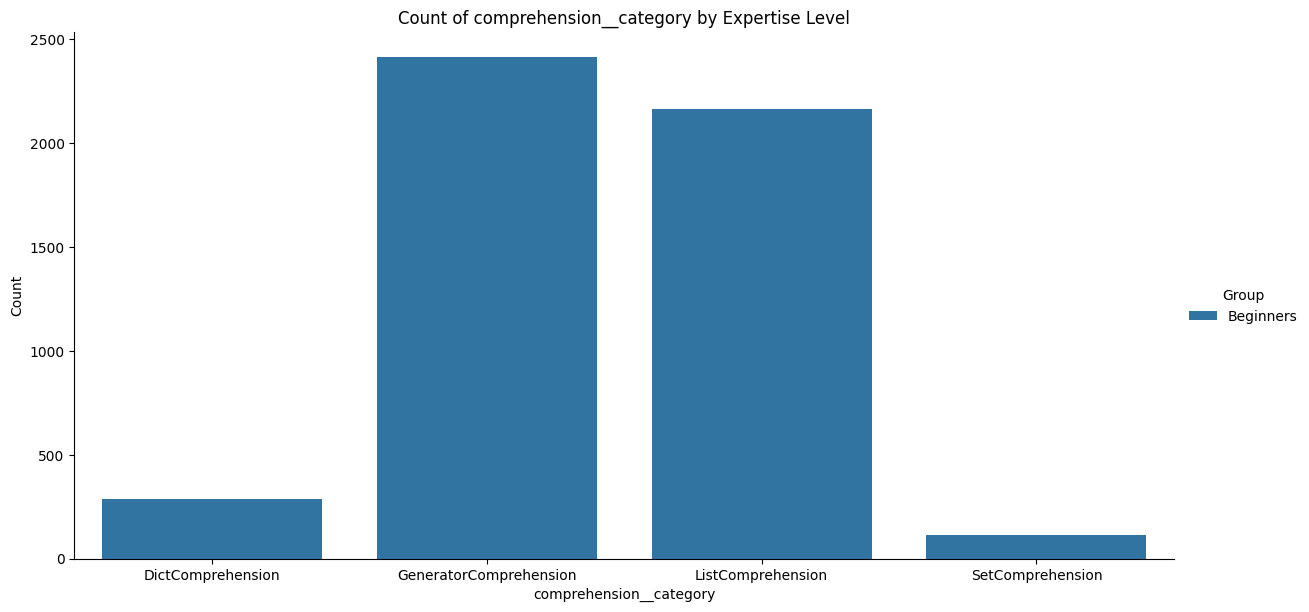

In [20]:
print_categorical_histogram(full_table, 'comprehension__category',TARGET_FEATURE, include_all=False, include_experts=False)

In [21]:
print_frequency_anal_for_cat_var(full_table, 'comprehension__category')

La variable comprehension__category contiene 4 valores distintos.
El umbral de outlier es de 0.05%
La variable comprehension__category toma el valor de GeneratorComprehension en un 48.45% de los items.
La variable comprehension__category toma el valor de ListComprehension en un 43.48% de los items.
La variable comprehension__category toma el valor de DictComprehension en un 5.801% de los items.
La variable comprehension__category toma el valor de SetComprehension en un 2.268% de los items.


In [22]:
print_values_usage_for_cat_var(full_table, 'comprehension__category', COMPREHENSION_CATEGORY_VALUES)

La variable comprehension__category puede tomar 4 valores distintos
	4 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


## Multivariate

Isolation forest algorithm

In [23]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,comprehension__category,comprehension__number_of_ifs,comprehension__number_of_generators,comprehension__is_async,comprehension__expertise_level
115,SetComprehension,0,3,False,BEGINNER
1061,SetComprehension,0,3,False,BEGINNER
1869,SetComprehension,0,3,False,BEGINNER
2677,SetComprehension,0,3,False,BEGINNER
3486,SetComprehension,0,3,False,BEGINNER
4291,SetComprehension,0,3,False,BEGINNER


### IMPORTANTE
Revisar los 6 outliers detectados

In [24]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
comprehension__number_of_ifs,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
comprehension__number_of_generators,6.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
comprehension__is_async,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
comprehension__category_DictComprehension,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
comprehension__category_GeneratorComprehension,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
comprehension__category_ListComprehension,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
comprehension__category_SetComprehension,6.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [25]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
comprehension__number_of_ifs,4976.0,0.252211,0.437093,0.0,0.0,0.0,1.0,2.0
comprehension__number_of_generators,4976.0,1.031752,0.182106,1.0,1.0,1.0,1.0,3.0
comprehension__is_async,4976.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
comprehension__category_DictComprehension,4976.0,0.058079,0.233916,0.0,0.0,0.0,0.0,1.0
comprehension__category_GeneratorComprehension,4976.0,0.485129,0.499829,0.0,0.0,0.0,1.0,1.0
comprehension__category_ListComprehension,4976.0,0.435289,0.495845,0.0,0.0,0.0,1.0,1.0
comprehension__category_SetComprehension,4976.0,0.021503,0.145069,0.0,0.0,0.0,0.0,1.0
